<a href="https://colab.research.google.com/github/jazaineam1/Andes_ADDBD/blob/main/Sesion15/15_Aprendizaje_no_supervisado-agrupaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Análisis de Datos y Big data***

## ***Universidad de los Andes***
>## **Dirección de Educación Continua.**
>>## **Formación de habilidades escenciales.**

![Imágen1](https://github.com/jazaineam1/Andes_ADDBD/blob/main/Imagenes/Presentaci%C3%B3n-removebg-preview.png?raw=true)

**Ver la presentación  [acá](https://github.com/jazaineam1/Andes_ADDBD/raw/main/Sesion15/15_Agrupacion.pdf)**
# Clase 15
#  Aprendizaje no supervisado
## Agrupación K-medias, jerárquica y DBSCAN

Seguimos con la base de datos de consumidores de ayer.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans

from sklearn.cluster import DBSCAN

from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram

import warnings
warnings.filterwarnings('ignore')

## Datos
Tenemos una base de datos: la unidad de observación son consumidores de un centro comercial.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/jazaineam1/Andes_ADDBD/main/Sesion15/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Visualicemos esos consumidores

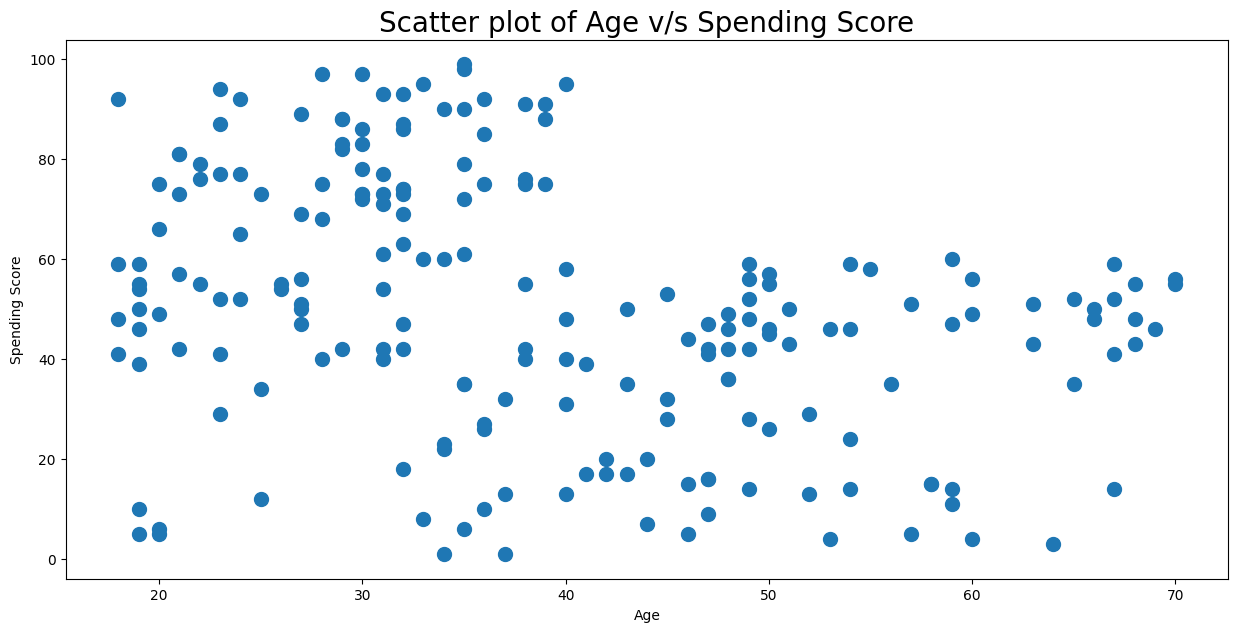

In [ ]:
plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter plot of Age v/s Spending Score', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, s = 100)
plt.show()

## Modelos
Vamos a crear los siguientes modelos de agrupación y los vamos a comparar:
* K-medias
* Agrupación jerárquica
* Agrupación por densidad DBSCAN

### K-means
En K-medias, los centros se mueven hacia los datos cercanos, y luego los datos cercanos escogen su centro más cercano, hasta que hay estabilidad.

In [ ]:
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
X1[0:5]

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40]])

### Análisis del codo

In [ ]:
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

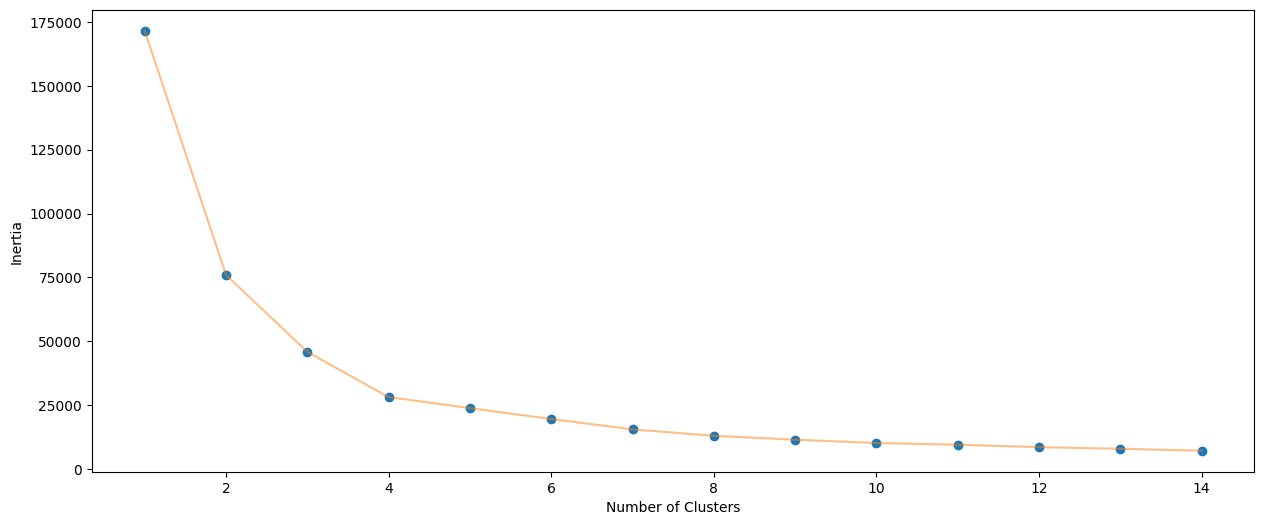

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

**Observamos que** parece que la incercia se estabiliza al rededor de cuatro grupos. Este puede ser un punto de partida, **pero no camisa de fuerza**, el criterio del analista es clave.

In [ ]:
## Después de haber hecho el análisis del codo, nos quedábamos con 4 grupos:

algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

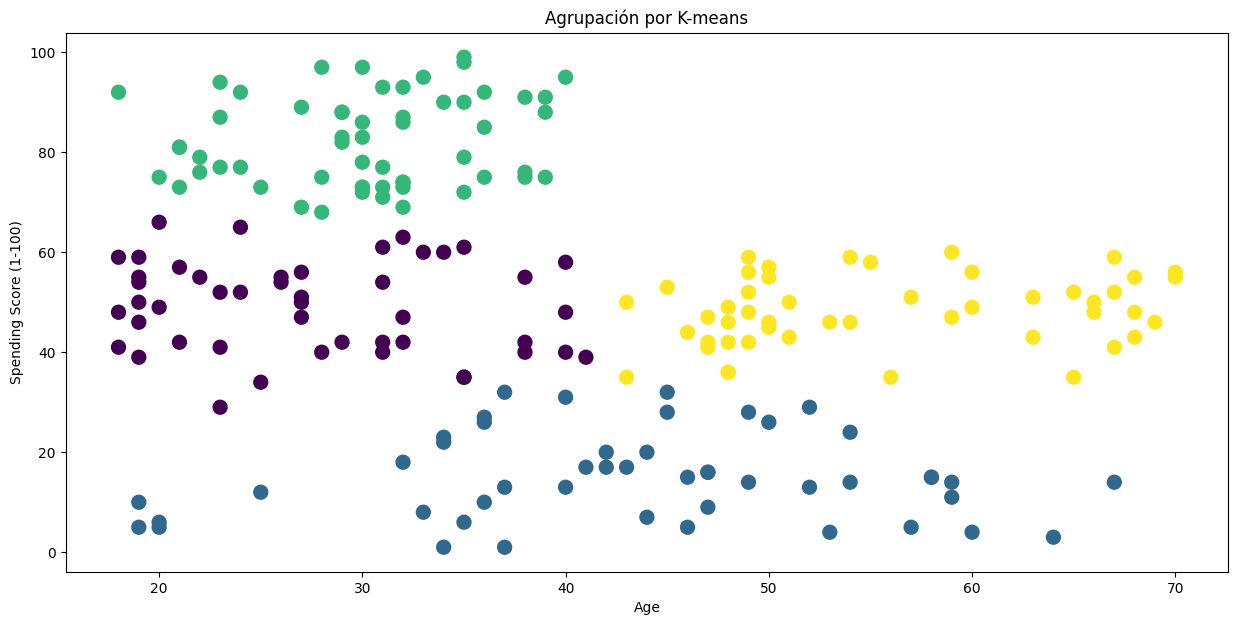

In [ ]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, c = labels1, s = 100)
#plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.title('Agrupación por K-means')
plt.show()

### Jerárquica
[Referencia](https://colab.research.google.com/github/goodboychan/chans_jupyter/blob/master/_notebooks/2020-06-06-02-Hierarchical-Clustering.ipynb#scrollTo=CdHHHWloEbov)

In [ ]:
# Formato correcto de los datos
X = df[['Age' , 'Spending Score (1-100)']]
X.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


<Axes: title={'center': 'Agrupación Jerárquica'}, xlabel='Age', ylabel='Spending Score (1-100)'>

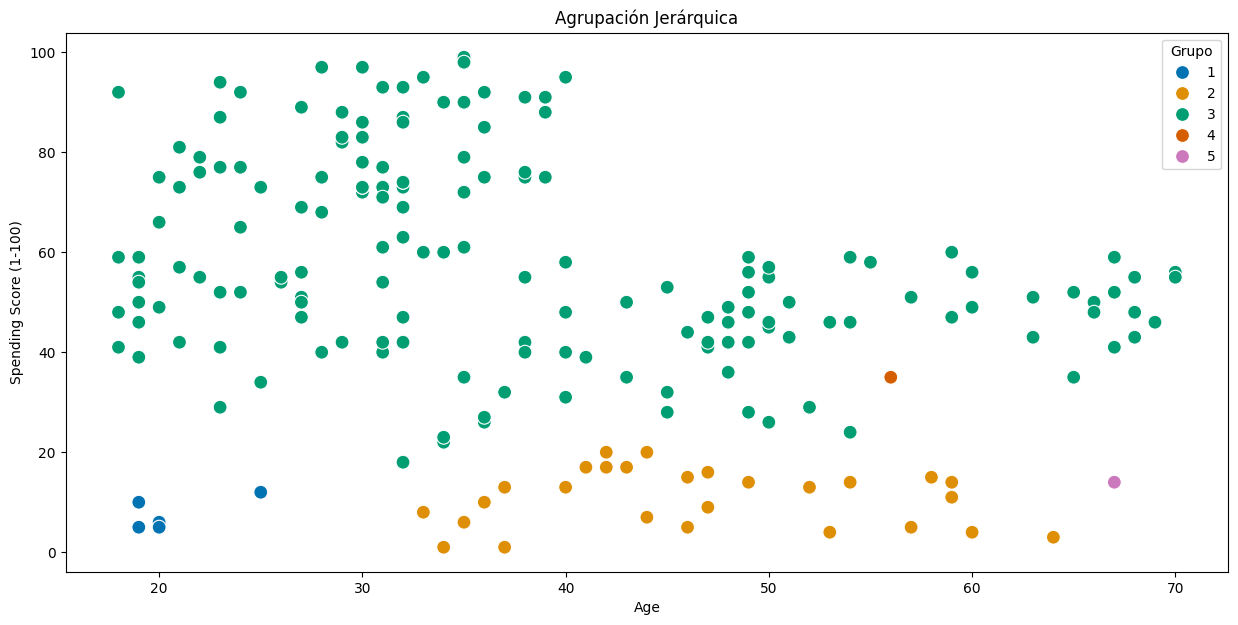

In [ ]:
# Use the linkage()
distance_matrix = linkage(X, method='single', metric='euclidean')

# Assign cluster labels
numero_grupos = 5
# maxclust: En cuentra la distancia óptima entre dos observaciones para la creación de grupos
X['Grupo'] = fcluster(distance_matrix, numero_grupos, criterion='maxclust')

# Plot clusters
plt.figure(2 , figsize = (15 , 7) )
plt.title('Agrupación Jerárquica')
sns.scatterplot(x='Age', y='Spending Score (1-100)', s=100, hue='Grupo', data=X, palette='colorblind')

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [5.0, 5.0, 23.75, 23.75],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [145.0, 145.0, 155.0, 155.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [165.0, 165.0, 182.5, 182.5],
  [205.0, 205.0, 215.0, 215.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [210.0, 210.0, 232.5, 232.5],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [285.0, 285.0, 295.0, 295.0],
  [262.5, 262.5, 290.0, 290.0],
  [305.0, 305.0, 315.0, 315.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [325.0, 325.0, 342.5, 342.5],
  [310.0, 310.0, 333.75, 333.75],
  [276.25, 276.25, 321.875, 321.875],
  [221.25, 221.25, 299.0625, 299.0625],
  [173.75, 173.75, 260.15625, 260.15625],
  [150.0, 150.0, 216.953125, 216.953125],
  [122.5, 122.5, 1

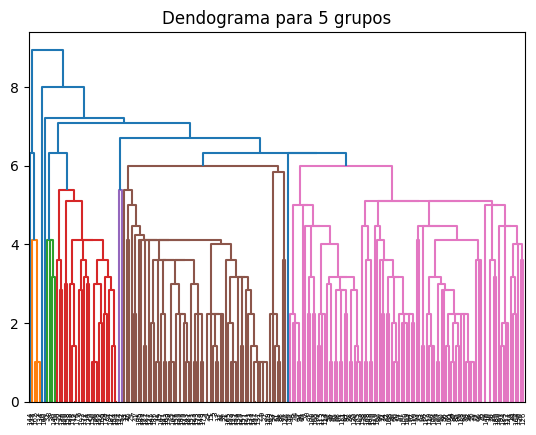

In [ ]:
plt.title('Dendograma para 5 grupos')
dendrogram(distance_matrix)

### DBSCAN

In [ ]:
# Usamos este formato
X1[0:5]

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40]])

In [ ]:
# eps: distancia máxima
# min_samples: número de datos para ser popular
modeloDensidad = DBSCAN(eps=6, min_samples=3).fit(X)
etiquetas = modeloDensidad.labels_
modeloDensidad

DBSCAN(eps=6, min_samples=3)

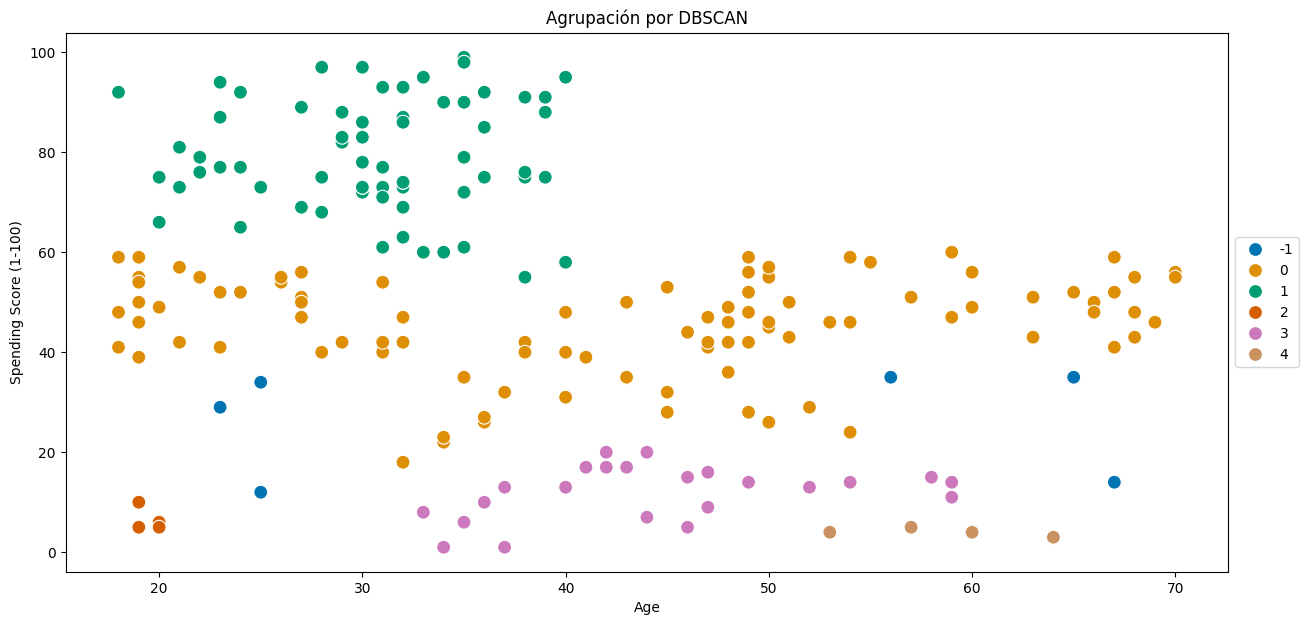

In [ ]:
plt.figure(3 , figsize = (15 , 7) )
plt.title('Agrupación por DBSCAN')
c= sns.scatterplot(x='Age', y='Spending Score (1-100)', s=100, hue=etiquetas, data=X, palette='colorblind')
c.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)